# Homework 04 - TensorFlow

In this homework you will practice what you learned about TensorFlow. You will implement the same network as in the last homework. But instead of using NumPy you will use TensorFlow.

In [4]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

### Build the dataset.

In [5]:
x = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
t = np.array([0,1,1,0], dtype=np.float32)
train_dataset = tf.data.Dataset.from_tensor_slices((x,t))

### The model.

We will build the following model

![model](https://raw.githubusercontent.com/lukeeffenberger/IANNWTF-2019/master/homework-figures/mlp_xor.png)

The activation function for **all** neurons is the logistic function

$$ \sigma(x) = \frac{1}{1+e^{-x}}. $$

You can reuse many parts from the notebook from the TensorFlow lecture.

When building the model make sure to do the following:
* initialize the weights with a random normal distribution with mean 0.0 and standard deviation 0.5
* initialize the biases with a random normal distribution with mean 0.0 and standard deviation 0.05

Check 'tf.random_normal_initializer()'.


### Implement the model.

In [3]:
from tensorflow.keras.layers import Layer

### YOUR CODE HERE ###
# Implement the class for a linear layer.

class Linear(Layer):
    """y = w.x + b"""
    
    def __init__(self, units):
        super(Linear, self).__init__()
        self.units = units
        
    def build(self, input_shape):
        self.w = self.add_weight(
                        shape=(input_shape[-1], self.units),
                        initializer=tf.random_normal_initializer(stddev=0.5),
                        trainable=True
        )
        self.b = self.add_weight(
                        shape=(self.units,),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
    
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

######################

In [4]:
### YOUR CODE HERE ###
# Implement the class for the MLP.
# Check 'tf.math.sigmoid()' for the activation function.

class MLP(Layer):
    
    def __init__(self):
        super(MLP, self).__init__()
        # Here we instantiate the layers of our network
        self.hidden_layer = Linear(4)
        self.output_layer = Linear(1)
         
    def call(self, x):
        x = self.hidden_layer(x)
        x = tf.math.sigmoid(x)
        x = self.output_layer(x)
        x = tf.math.sigmoid(x)
        return x
    
######################

### Train the model.

Now that the model is built we train the network. Again you can reuse parts from the lecture. Note that we do not use any test data here, because there are only four data points.

Make sure you do the following:
* Use mean squared error as loss function.
* Use the SGD optimizer with learning rate 1.
* Train for 500 epochs.
* For each epoch calculate the loss and accuracy and store it in a list. Note that there are no test data.

If your model is not able to achieve 100% accuracy try and run it again. Sometimes you just have bad luck with initialization.

In [5]:
tf.keras.backend.clear_session()

### YOUR CODE HERE ###
# Initialize and train the MLP.
losses = []
accuracies = []
epochs = []

for epoch in range(500):
    epochs.append(epoch)
    # Buffer to calculate loss and accuracy for each epoch.
    accuracy_buffer = 0
    loss_buffer = 0
    for (x,t) in train_dataset:
        # Reshape the such that it is processed as a 2-dimensional input.
        x = tf.reshape(x,shape=(-1,2))
        # Forward step and compute gradients.
        with tf.GradientTape() as tape:
            output = mlp(x)
            loss = mse(t, output)
            gradients = tape.gradient(loss, mlp.trainable_variables)
        # Apply gradients
        optimizer.apply_gradients(zip(gradients, mlp.trainable_variables))  
        # Store performance in buffer.
        accuracy_buffer += int(float(output>=0.5) == t)
        loss_buffer += loss
   
    accuracies.append(accuracy_buffer/4)
    losses.append(loss_buffer)
#######################

### Visualize the training progress.

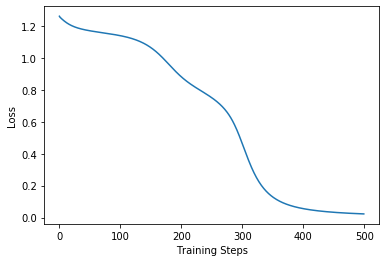

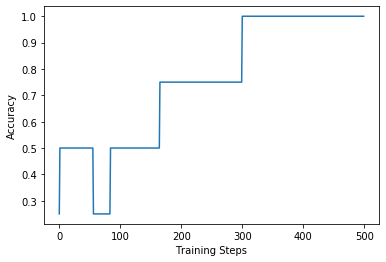

In [6]:
### YOUR CODE HERE ###
plt.figure()
plt.plot(epochs,losses)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs,accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()
######################